# WORKSHEET 1

Sirish Tandukar (2329527)
L6CG7

Getting Started with Image Processing with Python.

Introduction to Python Imaging Library(PIL)

## Exercise - 1:

1. Read and display the image.
• Read the image using the Pillow library and display it.
• You can also use matplotlib to display the image.

In [1]:
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


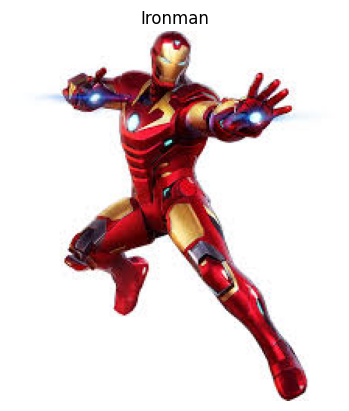

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/AI and ML/Ironman.jpg"
image_colored = Image.open(image_path)
image_colored.show()
plt.imshow(image_colored)
plt.axis("off")
plt.title("Ironman")
plt.show()


2. Display only the top left corner of 100x100 pixels.
• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

In [7]:
import numpy as np

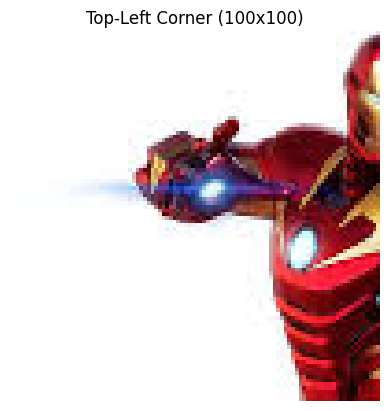

In [8]:
image_array = np.array(image_colored)
top_left_corner = image_array[:100, :100]
plt.imshow(top_left_corner)
plt.axis("off")
plt.title("Top-Left Corner (100x100)")
plt.show()

3. Show the three color channels (R, G, B).
• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

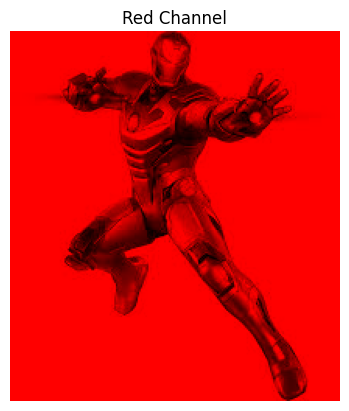

In [9]:
red_channel = image_array.copy()
red_channel[:, :, 1] = 0
red_channel[:, :, 2] = 0
plt.imshow(red_channel)
plt.title("Red Channel")
plt.axis("off")
plt.show()

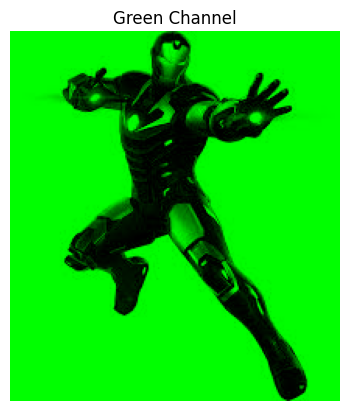

In [10]:
green_channel = image_array.copy()
green_channel[:, :, 0] = 0
green_channel[:, :, 2] = 0
plt.imshow(green_channel)
plt.title("Green Channel")
plt.axis("off")
plt.show()

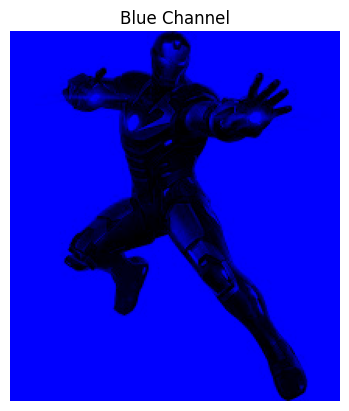

In [11]:
blue_channel = image_array.copy()
blue_channel[:, :, 0] = 0
blue_channel[:, :, 1] = 0
plt.imshow(blue_channel)
plt.title("Blue Channel")
plt.axis("off")
plt.show()

Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:
• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

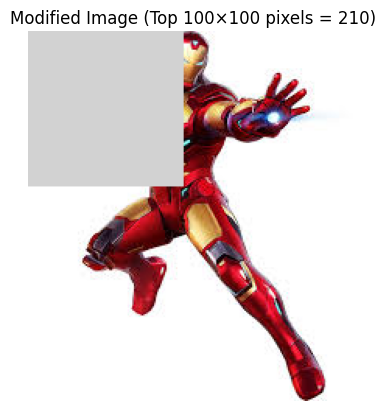

In [12]:
image_array[:100, :100] = 210
modified_image = Image.fromarray(image_array)
plt.imshow(modified_image)
plt.title("Modified Image (Top 100×100 pixels = 210)")
plt.axis("off")
plt.show()


## Exercise: 2

1. Load and display a grayscale image.
• Load a grayscale image using the Pillow library.
• Display the grayscale image using matplotlib.

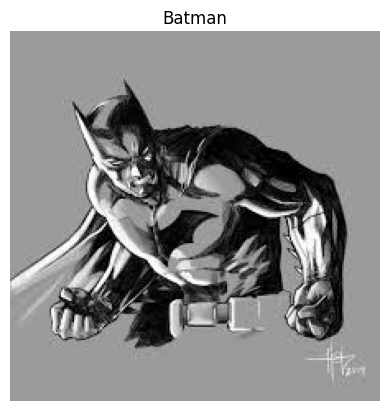

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/AI and ML/Batman.jpg"
image_grayed = Image.open(image_path).convert('L')
plt.imshow(image_grayed, cmap='gray')
plt.axis("off")
plt.title("Batman")
plt.show()


2. Extract and display the middle section of the image (150 pixels).
• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.

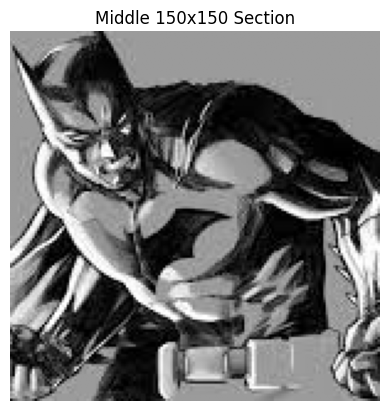

In [15]:
image_array = np.array(image_grayed)
height, width = image_array.shape
start_x = (width // 2) - 75
start_y = (height // 2) - 75
end_x = start_x + 150
end_y = start_y + 150
middle_section = image_array[start_y:end_y, start_x:end_x]
plt.imshow(middle_section, cmap='gray')
plt.axis("off")
plt.title("Middle 150x150 Section")
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
• Display the resulting binary image.

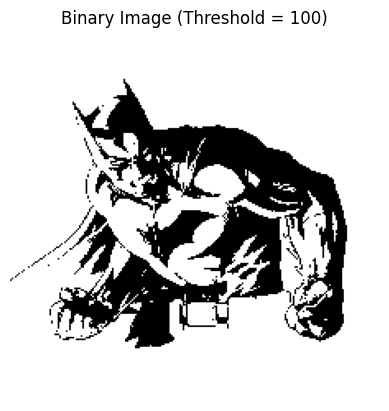

In [16]:
threshold_value = 100
binary_image = np.where(image_array < threshold_value, 0, 255)
plt.imshow(binary_image, cmap='gray')
plt.axis("off")
plt.title("Binary Image (Threshold = 100)")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.
• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
• Display the rotated image using matplotlib.

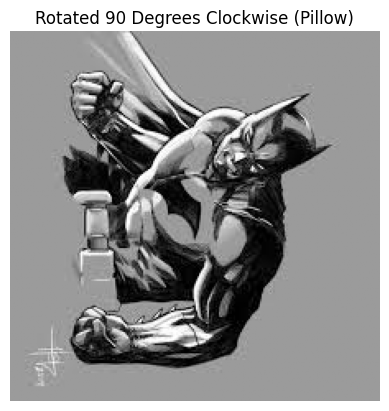

In [17]:
rotated_image = image_grayed.rotate(-90, expand=True)
plt.imshow(rotated_image, cmap='gray')
plt.axis("off")
plt.title("Rotated 90 Degrees Clockwise (Pillow)")
plt.show()

5. Convert the grayscale image to an RGB image.
• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).
• Display the converted RGB image using matplotlib.

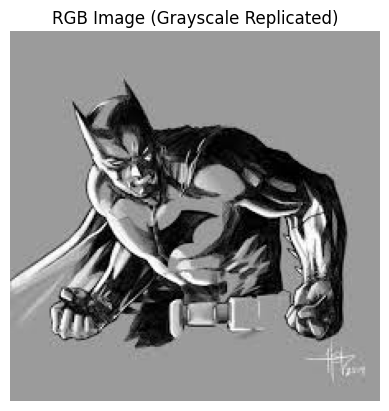

In [18]:
rgb_image = np.stack((image_array,) * 3, axis=-1)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("RGB Image (Grayscale Replicated)")
plt.show()

### 3 Image Compression and Decompression using PCA.

1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.

<ipython-input-38-b163d5fa6cd9>:11: RuntimeWarning: invalid value encountered in divide
  standardized_image = (image_array - mean_pixel) / std_pixel


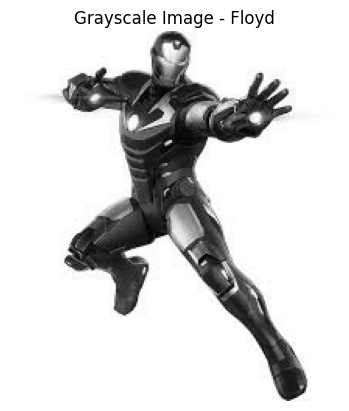

Covariance Matrix:
 [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/AI and ML/Ironman.jpg'
image_gray = Image.open(image_path).convert("L")
image_array = np.array(image_gray)

mean_pixel = np.mean(image_array, axis=0)
std_pixel = np.std(image_array, axis=0)
standardized_image = (image_array - mean_pixel) / std_pixel

reshaped_image = standardized_image.reshape(-1, image_array.shape[1])
cov_matrix = np.cov(reshaped_image, rowvar=False)

plt.imshow(image_gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image - Floyd")
plt.show()
print("Covariance Matrix:\n", cov_matrix)

2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.
• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.
• Identify the Principal Components with the help of cumulative Sum plot.

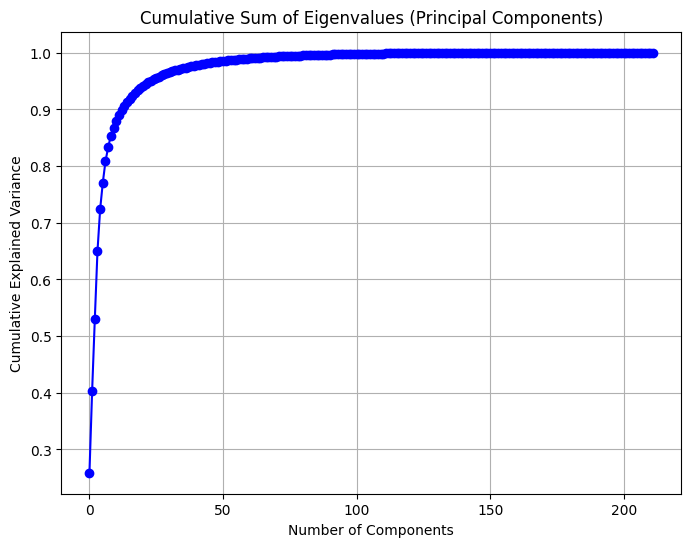

Sorted Eigenvalues:
 [ 5.19904522e+01+0.00000000e+00j  2.90029878e+01+0.00000000e+00j
  2.53816534e+01+0.00000000e+00j  2.41314709e+01+0.00000000e+00j
  1.48720632e+01+0.00000000e+00j  9.46429298e+00+0.00000000e+00j
  7.52700470e+00+0.00000000e+00j  4.97235578e+00+0.00000000e+00j
  4.01581781e+00+0.00000000e+00j  2.74978138e+00+0.00000000e+00j
  2.45135388e+00+0.00000000e+00j  2.18876427e+00+0.00000000e+00j
  1.79913612e+00+0.00000000e+00j  1.45081571e+00+0.00000000e+00j
  1.33062017e+00+0.00000000e+00j  1.20644322e+00+0.00000000e+00j
  1.04469188e+00+0.00000000e+00j  1.01484113e+00+0.00000000e+00j
  8.64336898e-01+0.00000000e+00j  8.21054203e-01+0.00000000e+00j
  7.14199251e-01+0.00000000e+00j  6.65541240e-01+0.00000000e+00j
  6.34755595e-01+0.00000000e+00j  5.87205178e-01+0.00000000e+00j
  5.41998762e-01+0.00000000e+00j  4.98991085e-01+0.00000000e+00j
  4.71620849e-01+0.00000000e+00j  4.47386441e-01+0.00000000e+00j
  4.22067555e-01+0.00000000e+00j  3.74795476e-01+0.00000000e+00j
  3.

In [42]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/AI and ML/Ironman.jpg'
image_gray = Image.open(image_path).convert("L")
image_array = np.array(image_gray)

mean_pixel = np.mean(image_array, axis=0)
std_pixel = np.std(image_array, axis=0)
std_pixel[std_pixel == 0] = 1e-10
standardized_image = (image_array - mean_pixel) / std_pixel

if np.any(np.isnan(standardized_image)) or np.any(np.isinf(standardized_image)):
    print("Warning: NaN or inf values detected in standardized_image. Replacing them with 0.")
    standardized_image = np.nan_to_num(standardized_image, nan=0.0, posinf=0.0, neginf=0.0)

reshaped_image = standardized_image.reshape(-1, image_array.shape[1])
cov_matrix = np.cov(reshaped_image, rowvar=False)
if np.any(np.isnan(cov_matrix)) or np.any(np.isinf(cov_matrix)):
    print("Warning: NaN or inf values detected in cov_matrix. Replacing them with 0.")
    cov_matrix = np.nan_to_num(cov_matrix, nan=0.0, posinf=0.0, neginf=0.0)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
cumulative_sum = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
plt.figure(figsize=(8, 6))
plt.plot(cumulative_sum, marker='o', linestyle='-', color='b')
plt.title("Cumulative Sum of Eigenvalues (Principal Components)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()
print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("\nTop 5 Eigenvectors:\n", sorted_eigenvectors[:, :5])
k = np.argmax(cumulative_sum >= 0.95) + 1
print(f"Number of Components for 95% Variance: {k}")

3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

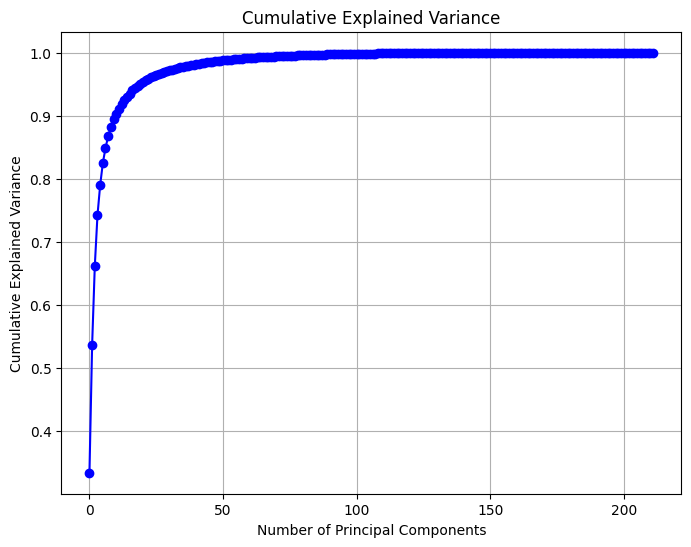

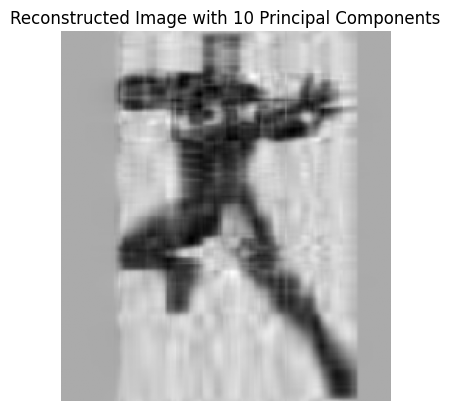

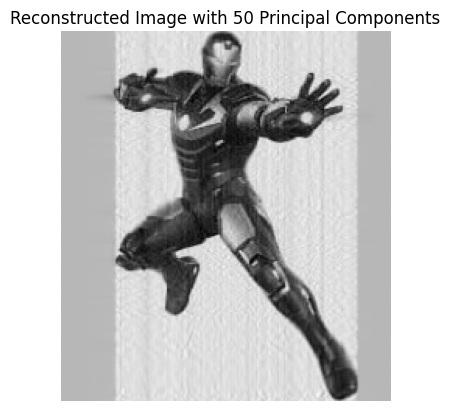

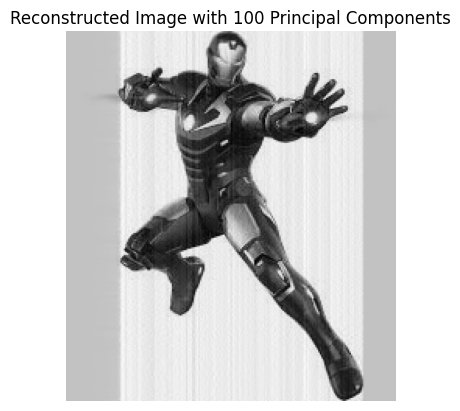

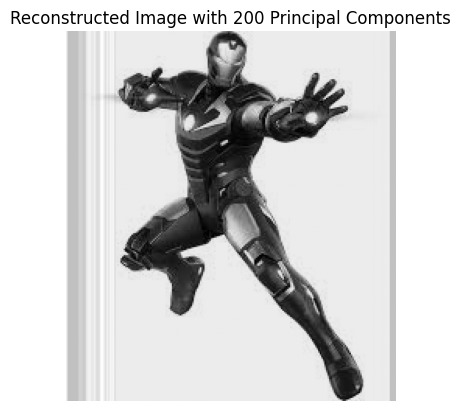

PSNR for 10 Principal Components: 1.12 dB
PSNR for 50 Principal Components: 1.12 dB
PSNR for 100 Principal Components: 1.12 dB
PSNR for 200 Principal Components: 1.12 dB


In [44]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

image_path = '/content/drive/MyDrive/AI and ML/Ironman.jpg'
image = Image.open(image_path).convert("L")
image_array = np.array(image)

flattened_image = image_array.flatten()


mean_pixel = np.mean(flattened_image)
std_pixel = np.std(flattened_image)
standardized_image = (flattened_image - mean_pixel) / std_pixel


standardized_image_2D = standardized_image.reshape(image_array.shape)

cov_matrix = np.cov(standardized_image_2D, rowvar=False)

eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

#Sort Eigenvalues and Eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals_sorted = eig_vals[sorted_indices]
eig_vecs_sorted = eig_vecs[:, sorted_indices]
cumulative_explained_variance = np.cumsum(eig_vals_sorted) / np.sum(eig_vals_sorted)
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


#top k components
k_values = [10, 50, 100, 200]
reconstructed_images = []
for k in k_values:
    top_k_eigenvectors = eig_vecs_sorted[:, :k]
    projected_data = np.dot(standardized_image_2D, top_k_eigenvectors)
    reconstructed_image = np.dot(projected_data, top_k_eigenvectors.T)
    reconstructed_images.append(reconstructed_image)

    plt.figure()
    plt.imshow(reconstructed_image, cmap="gray")
    plt.title(f"Reconstructed Image with {k} Principal Components")
    plt.axis("off")
    plt.show()

#reconstructed images PSNR
def psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))


original_image = image_array.astype(np.float32)
psnr_values = [psnr(original_image, recon) for recon in reconstructed_images]

for k, psnr_value in zip(k_values, psnr_values):
    print(f"PSNR for {k} Principal Components: {psnr_value:.2f} dB")